## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Read and print first 5 rows from ab_data.csv

df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# Print the number of rows from df dataframe

df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
# Print the number of unique users in df dataframe

df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# Print the proportion of individuals who converted

df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# Number of individuals from treatment group that didn't get the new page
num1 = df.query('group == "treatment" and landing_page != "new_page"').shape[0]

# Number of individuals from control group that got the new_page
num2 = df.query('group != "treatment" and landing_page == "new_page"').shape[0]

num_misaligned = num1 + num2

print('Number of individuals from treatment group that didn\'t get the new page:', num1)
print('         Number of individuals from control group that got the new page:', num2)
print('                                              Number of misaligned rows:', num_misaligned)

Number of individuals from treatment group that didn't get the new page: 1965
         Number of individuals from control group that got the new page: 1928
                                              Number of misaligned rows: 3893


f. Do any of the rows have missing values?

In [7]:
# Check number of non-null cells

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Store the indexes of rows where group and landing_page values don't fit

to_drop_indexes = df.query('(group == "treatment" and landing_page == "old_page") \
                        or (group == "control" and landing_page == "new_page")').index

# Drop the stored indexes rows from df2 dataframe

df2 = df.drop(to_drop_indexes, axis=0)

In [9]:
# Double Check all of the correct rows were removed - this should be 0

df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# Print number of unique values in user_id column from df2 dataframe

df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# Print the user_id which is duplicated

df2[df2.user_id.duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
# Print the rows whose id is duplicated

df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# Store the row index from the last duplicate

last_duplicate_index = df2[df2.user_id.duplicated(keep='first')].index

# Drop row whose index has just been stored

df2.drop(last_duplicate_index, axis=0, inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# Print the proportion of individuals who converted

df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# Store and print the number of indivuals from control group who converted

p_ctrl_convert = df2.query('group == "control"').converted.mean()
p_ctrl_convert

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# Store and print the number of indivuals from treatment group who converted

p_treat_convert = df2.query('group == "treatment"').converted.mean()
p_treat_convert

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
# Print the proportion of individuals who received the new page

df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

- Probability of an individual converting regardless of the page: 11.96%
- Probability of an individual from control group converting: 12.04%
- Probability of an individual from treatment group converting: 11.88%

As we can see, the probabilities are very close to each other, so we have no evidence that one page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$ H_0: p_{new} \leq p_{old} $$
$$ H_1: p_{new} > p_{old} $$

$$ Alpha = 0.05 $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
# Store and print the proportion of individuals who converted

p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
# Assign the same value from p_new into p_old, as under the null hypotheses p_new = p_old

p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$?

In [20]:
# Store and print the number of individuals who received the new page

n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [21]:
# Store and print the number of individuals who received the old page

n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
# Choose between 0 or 1, n_new times. p(0) = 1-p_new; p(1) = p_new

new_page_converted = np.random.choice([0, 1], n_new, p=(1-p_new, p_new))

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
# Choose between 0 or 1, n_old times. p(0) = 1-p_old; p(1) = p_old

old_page_converted = np.random.choice([0, 1], n_old, p=(1-p_old, p_old))

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
# Print the difference between the avarages of new_page_converted and old_page_converted lists

new_page_converted.mean() - old_page_converted.mean()

0.003955639403723274

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [25]:
# Define the number of repetitions

num_repetitions = int(1e4)

# The following lines stores the number of successful events (success chance = p_new/p_old) 
# in n_new/n_old trials and then divide it by the number of trials.
# Each simulation repeats num_repetitions times.

new_simulation = np.random.binomial(n_new, p_new, num_repetitions)/n_new
old_simulation = np.random.binomial(n_old, p_old, num_repetitions)/n_old

# Store the difference between the above simulations

p_diffs = new_simulation - old_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

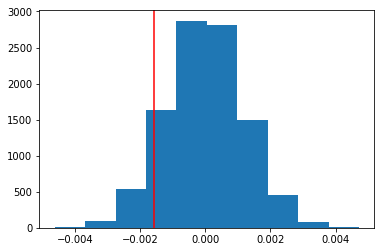

In [26]:
# Store the difference between the conversion proportion of each group

obs_diff = p_treat_convert - p_ctrl_convert

# Plot a histogram of p_diffs
# The red line represents the difference calculated above

plt.hist(p_diffs)
plt.axvline(obs_diff, color='r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
# Transform p_diffs from python list to numpy array
p_diffs = np.array(p_diffs)

# Calculate the p_value

p_value = (p_diffs > obs_diff).mean()
p_value

0.9034

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- p_diffs stands for the sampling distribution from the null hypothesis, i.e. when the proportion of individuals' conversions in control group is the same of the proportion of individuals' conversions in treatment group.
- obs_diff stands for the difference between the treatment group conversion proportion and the control group conversion proportion
- When we calculate the mean of the p_diffs values greater than the obs_diff, we're actually calculating the p_value.
- When the p_value is greater than alpha (which is usually 0.05) we fail to reject the null hypothesis, when it's lesser or equal than alpha, we reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

# Calculate the number of individuals that converted from each group

convert_old = df2.query('group == "control" and converted == 1').shape[0]
convert_new = df2.query('group == "treatment" and converted == 1').shape[0]

#Calculate the number of individuals in each of the groups

n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
from scipy.stats import norm

# Calculate the z-score and the p-value with proportions_ztest

z_score, sm_p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

print('Z-SCORE.................................', z_score)
print('Conf. Interval (95%):', norm.ppf(1-(0.05/2)))
print('\n')
print('P-VALUE.................................', sm_p_value)

Z-SCORE................................. 1.3109241984234394
Conf. Interval (95%): 1.959963984540054


P-VALUE................................. 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- As we can see, the Z-SCORE is within the 95% confidence interval [-1.9599, 1.9599], so we fail to reject the null hypothesis.
- The above p-value is pretty similar to the one we calculated at question j.; It's a great p-value so we fail to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

- We should perform the logistic regression, since it's the one used to predict only two possible categorical outcomes

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [30]:
# Get the dummy variables from group column (df2 dataframe)

group_dummies = pd.get_dummies(df2['group'])

# Create a new dataframe by joinning the dummy variables columns with df2 dataframe

df_new = df2.join(group_dummies)

df_new['intercept'] = 1
df_new.rename(columns={'treatment':'ab_page'}, inplace=True)
df_new.drop(['group', 'control', 'landing_page'], axis=1, inplace=True)

df_new.head()

,user_id,timestamp,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,0,0,1
1,804228,2017-01-12 08:01:45.159739,0,0,1
2,661590,2017-01-11 16:55:06.154213,0,1,1
3,853541,2017-01-08 18:28:03.143765,0,1,1
4,864975,2017-01-21 01:52:26.210827,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [31]:
# Create a logistic model. Response variable: converted; Explanatory variables: intercept, ab_page
# The baseline is the control group

logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [32]:
# Fit the above model

results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Jul 2019   Pseudo R-squ.:               8.077e-06
Time:                        13:30:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

- The p-value from the above summary is used to choose one of the following hypothesis: $$ H_0: \beta_1 = 0  $$ $$ H_1: \beta_1 \neq 0  $$ If it's greater than alpha, we fail to reject $H_0$ which leads us to a formula ($y = \beta_0 + \beta_1*x_1 + ... + \beta_n*x_n$) where any value from the explanatory ($x_1$) variable would be multiplied by 0 and would have no impact predicting $y$.


- As we can see, the p-value for ab_page is greater than alpha (usually 0.05). It means there is no relationship between the conversion rate and which page an individual received.

- The p-value from **Part II** is not used to check whether or not an explanatory variable is useful to predict a response variable. Instead, it's used to pick a hypothesis used to draw a conclusion about a population.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- Adding other factors is interesting because it allows us to check relationships we didn't notice at first glance.
- Disadvantages:
    - You may add interrelated factors, yelding deceiveful predictions.
    - The relationships might be harder to understand, leading us to interpreting mistakes.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [33]:
# Read countries.csv as countries dataframe

countries = pd.read_csv('countries.csv')

# Inner merge of df_new and countries dataframes on user_id column

df_new = pd.merge(df_new, countries, on=['user_id'], how='inner')

# Get dummy variables from country column 

country_dummies = pd.get_dummies(df_new['country'])

# Join the dummy variables with df_new

df_new = df_new.join(country_dummies)

df_new.head()

,user_id,timestamp,converted,ab_page,intercept,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,0,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,0,0,1,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,1,0,1,US,0,0,1


In [34]:
# Create and fit the logist model. Response variable: converted; Explanatory variables: intercept, ab_page, US, UK
# The baseline is the control group from CA

logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 15 Jul 2019   Pseudo R-squ.:               2.323e-05
Time:                        13:30:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

In [35]:
# Exponentiate the coefficients

np.exp(-0.0149), np.exp(0.0408), np.exp(0.0506)

(0.9852104557227469, 1.0416437559600236, 1.0519020483004984)

In [36]:
# Get the reciprocal from ab_page coefficient

1/np.exp(-0.0149)

1.0150115583846535

- As we can see, none of the explanatory variables are statistically significant. If they were statistically significant, we could interpret them this way:
    - The intercept is the baseline for an individual from CA in control group.
    - A CA individual from control group is 1.50% more likely to convert than one from treatment group.
    - An US individual from control group is 4.16% more likely to convert than one from CA in control group.
    - An UK individual from control group is 5.19% more likely to convert than one from UK in control group.
    - (Note that these values are not even pratically significant because of the low percentages)

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [37]:
# Create and fill up the interaction columns

df_new['ab_page*CA'] = df_new.ab_page * df_new.CA
df_new['ab_page*UK'] = df_new.ab_page * df_new.UK
df_new['ab_page*US'] = df_new.ab_page * df_new.US

df_new.head()

,user_id,timestamp,converted,ab_page,intercept,country,CA,UK,US,ab_page*CA,ab_page*UK,ab_page*US
0,851104,2017-01-21 22:11:48.556739,0,0,1,US,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,0,0,1,US,0,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,0,1,1,US,0,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,0,1,1,US,0,0,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,1,0,1,US,0,0,1,0,0,0


In [38]:
# Create a logit model and fit it. 
# Response variable: converted; Explanatory variables: intercept, ab_page, ab_page*US, ab_page*UK, US, UK

logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'ab_page*US', 'ab_page*UK', 'US', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 15 Jul 2019   Pseudo R-squ.:               3.482e-05
Time:                        13:30:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
ab_page*US     0.0469      0.054      0.872      0.383      -0.059       0.152
ab_page*UK     0.0783      0.057      1.378      0.168      -0.033       0.190
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
==============================================================================
"""

All explanatory variables have p-values greater than 0.05, which means none are statistically significant. As interactions were added, the conclusions are too complex for me to understand.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0